# IFS - Data Science - Alex Paulo
### KNN
### Dataset from http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

### O que é o KNN (K-Nearest Neighbor)?


![KNN](./knn.png "KNN")

Me diga com quem tu andas... eu direi quem tu és!!!


# Exercício

##### 1) Crie uma aplicação que faça uso do subset da base gratuita existente em https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits, disponibilizada por meio do método "datasets.load_digits()" da API scikit-learn. A carga sugerida deve ser feita com a seguinte linha de código: "digits = datasets.load_digits()"

##### 2) Faça uma análise exploratória dos dados por meio dos métodos "keys()" e "DESCR"

##### 3) Investigue os shapes das imagens e das suas respectivas chaves.

##### 4) Exiba as imagens com as chaves compreendidas no intervalo 1010 a 1019, seguidas de um rótulo que identifica a classe de cada uma.

##### 5) Crie uma camada de aprendizado utilizando a classe KNeighborsClassifier, considerando o K = 7.

##### 6) Mensure a acurácia do aprendizado concretizado na questão anterior.

##### 7) Crie um loop com o objetivo de treinar o classificador com diferentes Ks (variando de um a nove). Para cada treinamento concretizado, armazene, em um vetor intitulado "train_accuracy" o histórico de acurácias quando o teste for realizado com os mesmos dados utilizados no treinamento. E, em um vertor intitulado "test_accuracy", o histórico de acurácias quando o teste for realizado com os dados elencados para treinamento.

##### 8) Com o objetivo de estudar as relações entre Overfitting e Underfitting, construa um gráfico com os vetores de histórico de acurácia montados na questão anterior.


### EDA (Exploratory Data Analyse)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

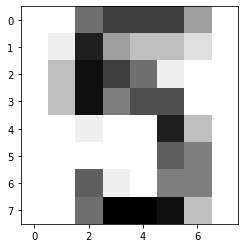

LABEL =  5


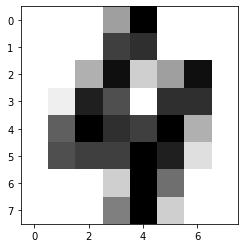

LABEL =  4


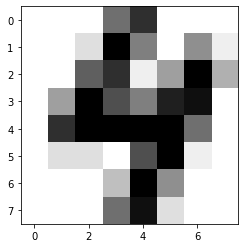

LABEL =  4


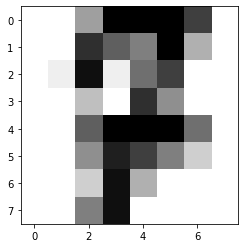

LABEL =  7


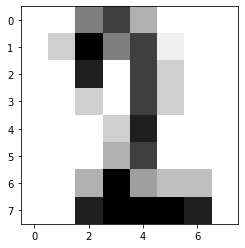

LABEL =  2


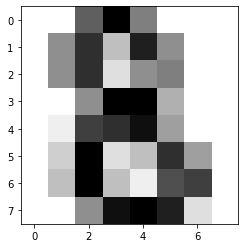

LABEL =  8


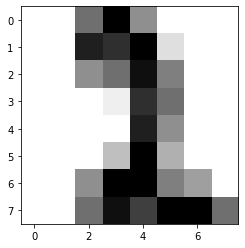

LABEL =  2


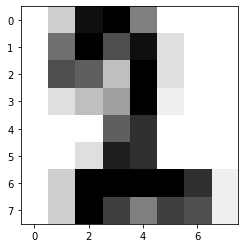

LABEL =  2


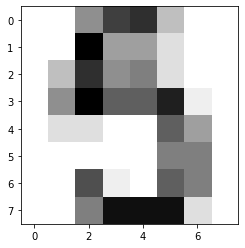

LABEL =  5


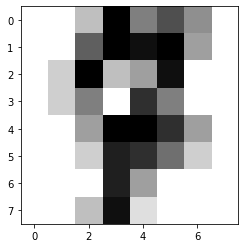

LABEL =  7


In [28]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print( digits.keys() )
print( digits.DESCR )

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)


for img in range(10):
    pos = img + 1010
    plt.imshow(digits.images[pos], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    print('LABEL = ', digits.target[pos])

### Accuracy for K = 7

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


### Overfitting x Underfitting

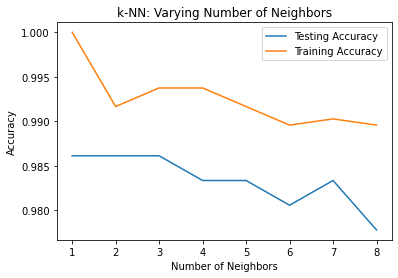

In [12]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
